Data Source: 

NCAA MBB Team Ranking 2020
https://www.ncaa.com/rankings/basketball-men/d1/ncaa-mens-basketball-net-rankings

#### Is there a strong relationship between team ranking and performance outcome in the NCAA Tournament? 

Import libraries

In [1]:
import pandas as pd

Load Data Frames onto notebook

In [2]:
#Load Basketball Stats CSV file into data frame
dfbb = pd.read_csv ('bbstats.csv')
dfbb

,Unnamed: 0,RK,Role,Height,PLAYER,TEAM,CONF,ROLE,MIN%,PRPG!,...,Close2_made,Close2_attempted,Far2_made,Far2_attempted,FT_made,FT_attempted,2P_made,2P_attempted,3P_made,3P_attempted
0,0,1,Sr,83,Luka Garza,Iowa,B10,PF/C,78.8,7.0,...,176,256,60,152,141,199,237,408,44,100
1,1,2,So,73,Max Abmas,Oral Roberts,Sum,Scoring PG,95.8,6.6,...,65,113,54,118,135,151,119,231,97,224
2,2,3,Jr,71,Kendric Davis,SMU,Amer,Pure PG,86.8,6.5,...,56,84,33,86,70,84,89,170,25,67
3,3,4,Fr,76,Cameron Thomas,LSU,SEC,Wing G,84.6,6.0,...,52,81,83,210,194,220,135,291,68,209
4,4,5,So,82,Drew Timme,Gonzaga,WCC,PF/C,70.1,5.9,...,192,247,39,93,128,184,231,340,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1984,1985,Jr,80,Anthony Crump,Northern Illinois,MAC,Wing F,50.1,-1.8,...,18,47,8,27,8,23,26,74,5,16
1985,1985,1986,Fr,82,Kenan Sarvan,Coppin St.,MEAC,Stretch 4,51.3,-1.8,...,7,10,1,9,7,11,8,19,29,107
1986,1986,1987,So,73,Tre Wood,LIU Brooklyn,NEC,Combo G,48.1,-1.9,...,23,53,6,29,9,19,29,82,1,21
1987,1987,1988,Sr,78,Alexander Perry,Mississippi Valley S,SWAC,Wing G,50.5,-2.0,...,8,25,2,26,20,38,11,1,14,53


In [3]:
#Load NCAA MBB team ranking CSV file
dfr = pd.read_csv ('NCAA MBB Team Ranking 2020.csv')
#Change colunm name to matched with stat df 
dfr.rename({'SCHOOL':'TEAM'}, axis=1, inplace=True)
#select top 100 team
dfr = dfr.iloc[:100 , :]

### Performance Outcome Measurement:
- Find field goal percentage of each player in different point shot by dividing number of attemped shot to number of shot made
- Sort players by there team 
- Total number of point attempted and point made per team (top 15??)

In [4]:
#Rename colunms for data consistancy 
dfbb.rename({'CLOSE 2 %': 'CLOSE_2', 'FAR 2 %': 'FAR_2', 'FT %': 'FT','2P %':'Two_P','3P %':'Three_P','Dunk_Percentage':'Dunk'}, axis=1, inplace=True)
#Drop unnessary colunm
dfbb=dfbb.drop(columns=['Close2_made','Close2_attempted','Far2_made','Dunks_made','Dunks_attempted','Far2_attempted','FT_made','FT_attempted','2P_made','AST.1','REB','PTS','YEAR','2P_attempted','3P_made','3P_attempted','MIN%','Role','3PR','3P/100','Height','PRPG!','D-PRPG','BPM','OBPM','DBPM','ORTG','USG','EFG','TS','OR','DR','AST','TO','A/TO','BLK','STL','FTR','FC/40'])
#Merge dfbb with dfr
dfm = dfbb.merge(dfr, how='left', on='TEAM')
dfm

,Unnamed: 0,RK,PLAYER,TEAM,CONF,ROLE,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk,RANK,CONFERENCE
0,0,1,Luka Garza,Iowa,B10,PF/C,0.688,0.395,0.709,0.581,0.440,1.000000,7.0,Big Ten
1,1,2,Max Abmas,Oral Roberts,Sum,Scoring PG,0.575,0.458,0.894,0.515,0.433,0.000000,NaN,NaN
2,2,3,Kendric Davis,SMU,Amer,Pure PG,0.667,0.384,0.833,0.524,0.373,0.000000,59.0,AAC
3,3,4,Cameron Thomas,LSU,SEC,Wing G,0.642,0.395,0.882,0.464,0.325,1.000000,25.0,SEC
4,4,5,Drew Timme,Gonzaga,WCC,PF/C,0.777,0.419,0.696,0.679,0.273,0.954545,1.0,WCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1984,1985,Anthony Crump,Northern Illinois,MAC,Wing F,0.383,0.296,0.348,0.351,0.313,0.666667,NaN,NaN
1985,1985,1986,Kenan Sarvan,Coppin St.,MEAC,Stretch 4,0.700,0.111,0.636,0.421,0.271,0.500000,NaN,NaN
1986,1986,1987,Tre Wood,LIU Brooklyn,NEC,Combo G,0.434,0.207,0.474,0.354,0.048,0.000000,NaN,NaN
1987,1987,1988,Alexander Perry,Mississippi Valley S,SWAC,Wing G,0.320,0.077,0.526,0.200,0.264,0.000000,NaN,NaN


RK,PLAYER,TEAM,CONF,ROLE,CLOSE 2 %,FAR 2 %,FT %,2P %, 3P %
Variables from dfbb that will be used

In [5]:
dfn = dfm.dropna()
dfn

,Unnamed: 0,RK,PLAYER,TEAM,CONF,ROLE,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk,RANK,CONFERENCE
0,0,1,Luka Garza,Iowa,B10,PF/C,0.688,0.395,0.709,0.581,0.440,1.000000,7.0,Big Ten
2,2,3,Kendric Davis,SMU,Amer,Pure PG,0.667,0.384,0.833,0.524,0.373,0.000000,59.0,AAC
3,3,4,Cameron Thomas,LSU,SEC,Wing G,0.642,0.395,0.882,0.464,0.325,1.000000,25.0,SEC
4,4,5,Drew Timme,Gonzaga,WCC,PF/C,0.777,0.419,0.696,0.679,0.273,0.954545,1.0,WCC
5,5,6,Matthew Hurt,Duke,ACC,Stretch 4,0.750,0.566,0.724,0.635,0.444,1.000000,49.0,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,1813,1814,Damien Daniels,Abilene Christian,Slnd,Scoring PG,0.482,0.316,0.643,0.415,0.323,0.000000,74.0,Southland
1835,1835,1836,Andrej Jakimovski,Washington St.,P12,Wing F,0.370,0.176,0.600,0.295,0.320,0.000000,84.0,Pac-12
1854,1854,1855,Wabissa Bede,Virginia Tech,ACC,Scoring PG,0.455,0.432,0.727,0.438,0.245,0.000000,51.0,ACC
1867,1867,1868,Damion Baugh,Memphis,Amer,Combo G,0.528,0.370,0.682,0.460,0.263,0.400000,35.0,AAC


In [6]:
a = dfn.groupby(["TEAM"]).CLOSE_2.mean()
b = dfn.groupby(["TEAM"]).FAR_2.mean()
c = dfn.groupby(["TEAM"]).FT.mean()
d = dfn.groupby(["TEAM"]).Two_P.mean()
e = dfn.groupby(["TEAM"]).Three_P.mean()
f = dfn.groupby(["TEAM"]).Dunk.mean()

In [7]:
result = pd.concat([a,b,c,d,e,f], axis=1, join='inner')
display(result)

,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk
TEAM,,,,,,
Abilene Christian,0.547667,0.368333,0.667333,0.484500,0.364833,0.468567
Alabama,0.583167,0.303333,0.727833,0.509333,0.377667,0.621026
Arizona,0.619857,0.320429,0.710000,0.485714,0.261429,0.672309
Arizona St.,0.637500,0.354167,0.744000,0.497667,0.244833,0.630051
Arkansas,0.580667,0.360833,0.724500,0.504667,0.287333,0.902246
...,...,...,...,...,...,...
Wichita St.,0.580000,0.278000,0.706600,0.449200,0.268800,0.666667
Winthrop,0.601333,0.344167,0.709333,0.520833,0.285667,0.438301
Wisconsin,0.576286,0.338571,0.765000,0.455429,0.349143,0.658066


In [8]:
dfnn = result.merge(dfr, how='left', on='TEAM')
dfnn

,TEAM,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk,RANK,CONFERENCE
0,Abilene Christian,0.547667,0.368333,0.667333,0.484500,0.364833,0.468567,74,Southland
1,Alabama,0.583167,0.303333,0.727833,0.509333,0.377667,0.621026,8,SEC
2,Arizona,0.619857,0.320429,0.710000,0.485714,0.261429,0.672309,32,Pac-12
3,Arizona St.,0.637500,0.354167,0.744000,0.497667,0.244833,0.630051,99,Pac-12
4,Arkansas,0.580667,0.360833,0.724500,0.504667,0.287333,0.902246,14,SEC
...,...,...,...,...,...,...,...,...,...
87,Wichita St.,0.580000,0.278000,0.706600,0.449200,0.268800,0.666667,70,AAC
88,Winthrop,0.601333,0.344167,0.709333,0.520833,0.285667,0.438301,65,Big South
89,Wisconsin,0.576286,0.338571,0.765000,0.455429,0.349143,0.658066,23,Big Ten
90,Wright St.,0.595500,0.377167,0.726833,0.514333,0.325500,0.757781,75,Horizon


In [9]:
dfrs = dfnn.sort_values(by="RANK", ascending=True)
dfrs

,TEAM,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk,RANK,CONFERENCE
26,Gonzaga,0.729333,0.443333,0.752167,0.648500,0.318667,0.963853,1,WCC
7,Baylor,0.654333,0.376000,0.734000,0.531167,0.282000,0.785218,2,Big 12
42,Michigan,0.670000,0.360333,0.806000,0.514500,0.334500,0.758053,3,Big Ten
28,Illinois,0.661167,0.367500,0.710000,0.522500,0.299333,0.658537,4,Big Ten
27,Houston,0.635667,0.363333,0.703333,0.478833,0.279833,0.807692,5,AAC
...,...,...,...,...,...,...,...,...,...
50,Northwestern,0.636143,0.342429,0.718286,0.494286,0.361286,0.793878,96,Big Ten
47,Missouri St.,0.725333,0.425333,0.767500,0.545500,0.316500,0.452381,97,MVC
51,Notre Dame,0.640571,0.317429,0.795714,0.542000,0.330000,0.517730,98,ACC
3,Arizona St.,0.637500,0.354167,0.744000,0.497667,0.244833,0.630051,99,Pac-12


In [11]:
#Top 10 MBB team 
H = dfrs.head(9)
H

,TEAM,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk,RANK,CONFERENCE
26,Gonzaga,0.729333,0.443333,0.752167,0.648500,0.318667,0.963853,1,WCC
7,Baylor,0.654333,0.376000,0.734000,0.531167,0.282000,0.785218,2,Big 12
42,Michigan,0.670000,0.360333,0.806000,0.514500,0.334500,0.758053,3,Big Ten
28,Illinois,0.661167,0.367500,0.710000,0.522500,0.299333,0.658537,4,Big Ten
27,Houston,0.635667,0.363333,0.703333,0.478833,0.279833,0.807692,5,AAC
30,Iowa,0.573500,0.410000,0.715333,0.495000,0.389833,0.477339,7,Big Ten
1,Alabama,0.583167,0.303333,0.727833,0.509333,0.377667,0.621026,8,SEC
13,Colorado,0.600833,0.371000,0.847667,0.488000,0.334500,0.690278,9,Pac-12
37,Loyola Chicago,0.626286,0.383000,0.739286,0.553429,0.289286,0.393773,10,MVC


In [12]:
#Bottom 10 MBB team
T = dfrs.tail(9)
T

,TEAM,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk,RANK,CONFERENCE
78,UNC Greensboro,0.610667,0.350833,0.709167,0.510333,0.241167,0.747354,91,SoCon
8,Belmont,0.699167,0.360000,0.745000,0.602833,0.318167,0.474359,92,OVC
38,Marquette,0.603714,0.430714,0.736714,0.517857,0.391571,0.741896,93,Big East
59,Pepperdine,0.673333,0.365833,0.774333,0.523333,0.320833,0.583333,94,WCC
50,Northwestern,0.636143,0.342429,0.718286,0.494286,0.361286,0.793878,96,Big Ten
47,Missouri St.,0.725333,0.425333,0.767500,0.545500,0.316500,0.452381,97,MVC
51,Notre Dame,0.640571,0.317429,0.795714,0.542000,0.330000,0.517730,98,ACC
3,Arizona St.,0.637500,0.354167,0.744000,0.497667,0.244833,0.630051,99,Pac-12
24,Georgia,0.664167,0.335833,0.702667,0.544833,0.276500,0.666667,100,SEC


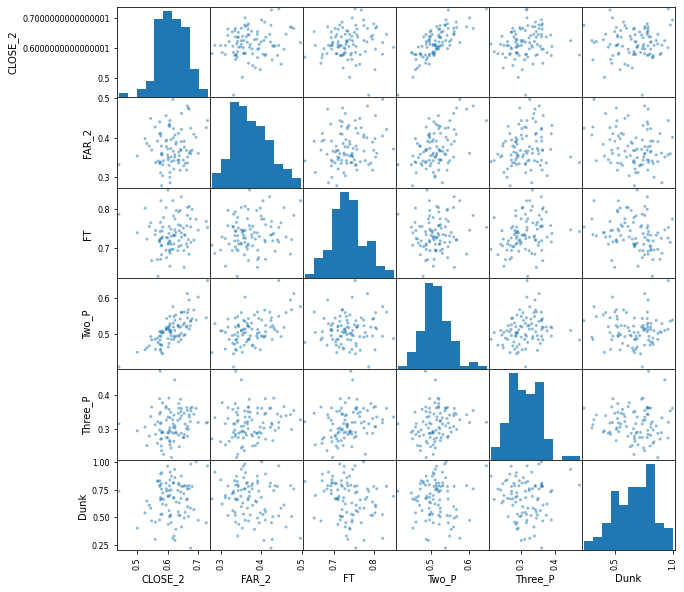

In [13]:
#Scater Plot of the stat of all team
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(dfnn[["CLOSE_2", "FAR_2", "FT", "Two_P", "Three_P", "Dunk"]], figsize=(10,10), diagonal="hist")
plt.show() 

<AxesSubplot:>

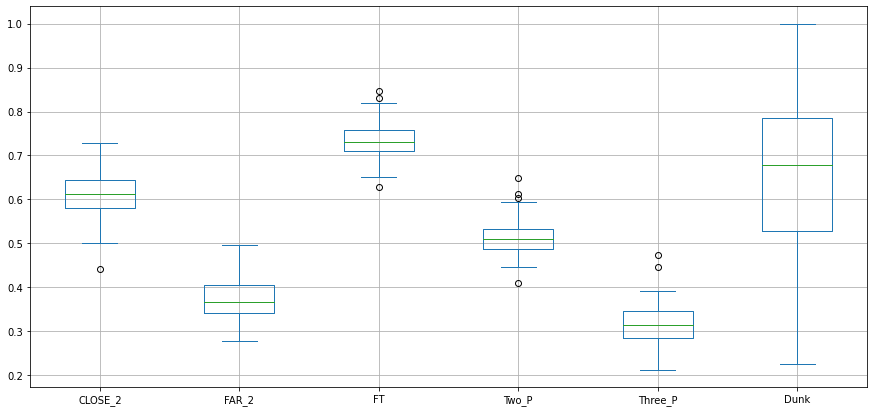

In [14]:
#Box Plot of the 
dfnn[["CLOSE_2", "FAR_2", "FT", "Two_P", "Three_P", "Dunk"]].plot(kind="box", grid=True, figsize=(15,7))

In [15]:
dfnn[["RANK", "CLOSE_2", "FAR_2", "FT", "Two_P", "Three_P", "Dunk"]].corr()

,RANK,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk
RANK,1.000000,0.034145,0.058337,-0.075694,0.081301,-0.121541,-0.108819
CLOSE_2,0.034145,1.000000,0.173494,0.106637,0.750087,0.165610,0.071434
FAR_2,0.058337,0.173494,1.000000,0.196161,0.473649,0.152280,-0.217455
FT,-0.075694,0.106637,0.196161,1.000000,0.078731,0.263919,-0.228948
Two_P,0.081301,0.750087,0.473649,0.078731,1.000000,0.214482,-0.019973
Three_P,-0.121541,0.165610,0.152280,0.263919,0.214482,1.000000,-0.042024
Dunk,-0.108819,0.071434,-0.217455,-0.228948,-0.019973,-0.042024,1.000000


In [16]:
#Correlation of stats top 10 team
H[["CLOSE_2", "FAR_2", "FT", "Two_P", "Three_P", "Dunk"]].corr()

,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk
CLOSE_2,1.000000,0.500206,0.045274,0.754085,-0.542537,0.721872
FAR_2,0.500206,1.000000,0.004014,0.619742,-0.140555,0.224363
FT,0.045274,0.004014,1.000000,-0.034113,0.142320,0.159714
Two_P,0.754085,0.619742,-0.034113,1.000000,-0.188505,0.387680
Three_P,-0.542537,-0.140555,0.142320,-0.188505,1.000000,-0.297652
Dunk,0.721872,0.224363,0.159714,0.387680,-0.297652,1.000000


In [17]:
#Correlation of stat from bottom 10 
T[["CLOSE_2", "FAR_2", "FT", "Two_P", "Three_P", "Dunk"]].corr()

,CLOSE_2,FAR_2,FT,Two_P,Three_P,Dunk
CLOSE_2,1.000000,0.188634,0.353888,0.649259,-0.033295,-0.810073
FAR_2,0.188634,1.000000,0.080751,0.019654,0.406144,-0.096795
FT,0.353888,0.080751,1.000000,0.234015,0.272184,-0.712900
Two_P,0.649259,0.019654,0.234015,1.000000,0.074963,-0.726010
Three_P,-0.033295,0.406144,0.272184,0.074963,1.000000,0.062514
Dunk,-0.810073,-0.096795,-0.712900,-0.726010,0.062514,1.000000
